In [8]:
from googleapiclient.discovery import build
from dotenv import load_dotenv
import csv
import os

# .env 파일에서 환경 변수 불러오기
load_dotenv()

# 환경 변수에서 API 키 가져오기
api_key = os.getenv('YOUTUBE_API_KEY')

# YouTube API 클라이언트 생성
youtube = build('youtube', 'v3', developerKey=api_key)

# 특정 동영상의 댓글 가져오기
# video_id = '7i7n57ga4do'  # 댓글을 가져올 동영상의 ID를 입력하세요

vd_link_all = [
    'P_k80bD40a8', 'gqXj-MkL6oM', 'UCytcrI9I4w', 'AUCNP_G3cps', 'j1mtI3U-o3k', 'AJmsyZ1P9wU',
    'hy1QdzhgV2A', 'S2sEQ8vdkmw', 'rEXqiVjVgQw'
]
video_list = vd_link_all

#저장할 폴더 이름(프로그램명) 설정
program_name = '꽃중년'

for video_id in video_list:
    comments = []
    next_page_token = None

    while len(comments) < 5000:  # 원하는 댓글 수에 도달할 때까지 반복
        request = youtube.commentThreads().list(
            part='snippet',
            videoId=video_id,
            maxResults=100,  # 한 번에 최대 100개까지 요청
            pageToken=next_page_token
        )
        response = request.execute()

        # 댓글 추출 및 저장
        for item in response['items']:
            comment = item['snippet']['topLevelComment']['snippet']
            comments.append({
                "author": comment['authorDisplayName'],
                "text": comment['textDisplay'],
                "likes": comment['likeCount'],
                "published_at": comment['publishedAt']
            })
        
        # 다음 페이지 토큰 확인
        next_page_token = response.get('nextPageToken')
        
        # 다음 페이지가 없으면 반복 중단
        if not next_page_token:
            break

    # 댓글 출력
    # for comment in comments[:1000]:  # 최대 200개까지만 출력
    #     print(f"Author: {comment['author']}")
    #     print(f"Comment: {comment['text']}")
    #     print(f"Likes: {comment['likes']}")
    #     print(f"Published At: {comment['published_at']}\n")

    print(f"Total comments fetched: {len(comments)}")

    # 댓글 출력 및 CSV 파일로 저장
    csv_filename = f"{program_name}/{video_id}.csv"

    with open(csv_filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        writer.writerow(["Author", "Comment", "Likes", "Published At"])  # CSV 헤더 작성

        for comment in comments[:5000]:  # 최대 1000개까지 출력 및 저장
            # print(f"Author: {comment['author']}")
            # print(f"Comment: {comment['text']}")
            # print(f"Likes: {comment['likes']}")
            # print(f"Published At: {comment['published_at']}\n")

            # CSV 파일에 댓글 정보 작성
            writer.writerow([
                comment['author'],
                comment['text'].replace('\n', ' '),  # 줄바꿈을 공백으로 대체
                comment['likes'],
                comment['published_at']
            ])

    print(f"댓글이 {csv_filename} 파일로 저장되었습니다.")
    print(f"저장된 총 댓글 수: {min(len(comments), 5000)}")

Total comments fetched: 134
댓글이 꽃중년/P_k80bD40a8.csv 파일로 저장되었습니다.
저장된 총 댓글 수: 134
Total comments fetched: 230
댓글이 꽃중년/gqXj-MkL6oM.csv 파일로 저장되었습니다.
저장된 총 댓글 수: 230
Total comments fetched: 8
댓글이 꽃중년/UCytcrI9I4w.csv 파일로 저장되었습니다.
저장된 총 댓글 수: 8
Total comments fetched: 10
댓글이 꽃중년/AUCNP_G3cps.csv 파일로 저장되었습니다.
저장된 총 댓글 수: 10
Total comments fetched: 394
댓글이 꽃중년/j1mtI3U-o3k.csv 파일로 저장되었습니다.
저장된 총 댓글 수: 394
Total comments fetched: 164
댓글이 꽃중년/AJmsyZ1P9wU.csv 파일로 저장되었습니다.
저장된 총 댓글 수: 164
Total comments fetched: 342
댓글이 꽃중년/hy1QdzhgV2A.csv 파일로 저장되었습니다.
저장된 총 댓글 수: 342
Total comments fetched: 215
댓글이 꽃중년/S2sEQ8vdkmw.csv 파일로 저장되었습니다.
저장된 총 댓글 수: 215
Total comments fetched: 1432
댓글이 꽃중년/rEXqiVjVgQw.csv 파일로 저장되었습니다.
저장된 총 댓글 수: 1432


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1913 entries, 0 to 1912
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Author        1913 non-null   object
 1   Comment       1913 non-null   object
 2   Likes         1913 non-null   int64 
 3   Published At  1913 non-null   object
dtypes: int64(1), object(3)
memory usage: 59.9+ KB


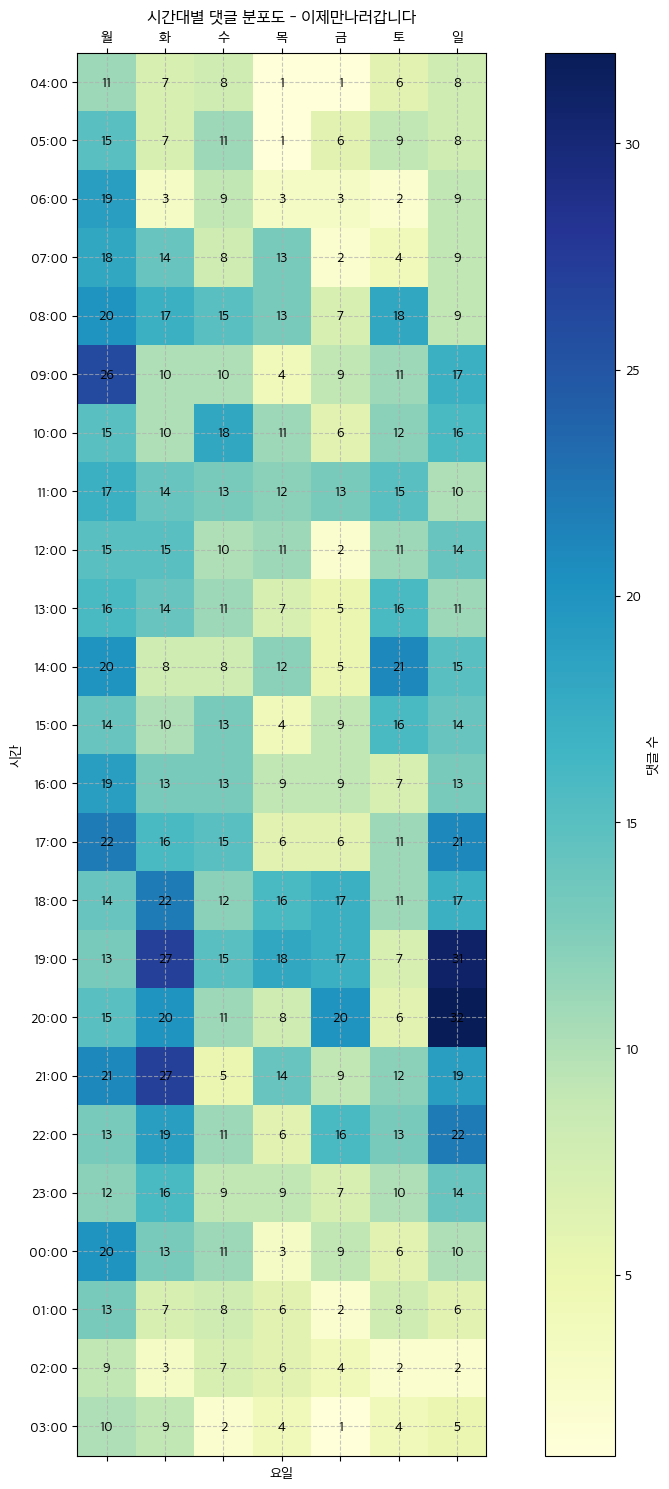

In [22]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from datetime import datetime
from pytz import timezone

# Mac에서 사용 가능한 한글 폰트 설정
font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()

# 폴더 리스트
programname= '이제만나러갑니다'
directories = [programname]

# 모든 CSV 파일을 읽어서 데이터프레임에 저장
all_files = []

for directory in directories:
    # 각 폴더 내의 CSV 파일 경로를 찾음
    csv_files = glob.glob(os.path.join(directory, '*.csv'))
    # CSV 파일을 읽어서 데이터프레임 리스트에 추가
    for file in csv_files:
        df = pd.read_csv(file)
        all_files.append(df)

# 모든 데이터프레임을 하나로 병합
df = pd.concat(all_files, ignore_index=True) 

df.info()

# UTC를 KST로 변환하는 함수
def utc_to_kst(utc_time):
    utc = timezone('UTC')
    kst = timezone('Asia/Seoul')
    utc_dt = utc.localize(datetime.strptime(utc_time, '%Y-%m-%dT%H:%M:%SZ'))
    kst_dt = utc_dt.astimezone(kst)
    return kst_dt

# 'Published At' 열을 UTC에서 KST로 변환
df['Published At'] = df['Published At'].apply(utc_to_kst)

# 1. 타임테이블 생성
def create_timetable():
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    timetable = {day: [0] * 24 for day in days}
    return timetable

# 2. 댓글 수를 타임테이블에 매핑
def map_comments_to_timetable(df, timetable):
    df['Published At'] = pd.to_datetime(df['Published At'])
    for comment_time in df['Published At']:
        day = comment_time.strftime('%a')
        hour = comment_time.hour
        if hour < 4:
            hour += 24
        # 인덱스 범위를 벗어나지 않도록 조정
        if hour >= 24:
            hour -= 24
        if day in timetable:
            timetable[day][hour] += 1

# 3. 시각화 함수
def visualize_timetable(timetable):
    days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    hours = list(range(4, 24)) + list(range(0, 4))
    
    # 댓글 수 배열 준비
    counts = np.array([[timetable[day][hour] for day in days] for hour in hours])

    # 시각화
    fig, ax = plt.subplots(figsize=(12, 15))
    cax = ax.matshow(counts, cmap='YlGnBu')

    # x축, y축 레이블 설정
    ax.set_xticks(np.arange(len(days)))
    ax.set_yticks(np.arange(len(hours)))
    ax.set_xticklabels(['월', '화', '수', '목', '금', '토', '일'])
    ax.set_yticklabels([f"{h:02d}:00" for h in hours])

    # 각 셀에 댓글 수 표시
    for i in range(len(hours)):
        for j in range(len(days)):
            ax.text(j, i, counts[i, j], ha='center', va='center', color='black')

    plt.xlabel('요일')
    plt.ylabel('시간')
    plt.title(f'시간대별 댓글 분포도 - {programname}')
    plt.colorbar(cax, label='댓글 수')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 메인 실행 코드
timetable = create_timetable()
map_comments_to_timetable(df, timetable)
visualize_timetable(timetable)